# Results of `KSE_modred_run_script.jl` 

This notebook is a tool for analysing the results of the latet run of the script `KSE_modred_run_script.jl`. 

In [12]:
using JLD, Dates
using PyPlot
using Statistics
using StatsBase

include("Model_Reduction_Dev.jl")

gen = "_Lin"

"_Lin"

Here is a table for the gen's

| gen |  T    |  T_disc |  h  | 
|:---:|:-----:|:-------:|:---:|
|1    | 400   | 100     | 0.01|
|2    | 3000  | 1000    |0.001| 
|3*   | 16,000| 1000    |0.001|

\* For gen 3 the `obs_gap` in the runscript is 1 but since the solver kept only 1 out of each 100 computed terms the effecitive `h` is 0.001 and `obs_gap` is 100 is this should be somewhat better than have ing `obs_gap` be 1 with `h` = 0.1  

In [13]:
# Load and look at original sol

Dat_sol = load("..\\Temp Developement\\Data\\KSE_sol$gen.jld")
# here are the run parameters

Dict{String,Any} with 26 entries:
  "p"                     => 1500
  "T"                     => 100000
  "P"                     => 21.55
  "short"                 => false
  "h"                     => 0.001
  "_creator\\JULIA_PATCH" => 0x00000000
  "gen"                   => "_Lin"
  "N"                     => 96
  "loadsol"               => false
  "dat_uu"                => [-6.97477 -6.95802 … 1.59996 1.60004; -6.96741 -6.…
  "loadwf"                => false
  "q"                     => 0.0:0.29156312330299705:27.69849671378472
  "d"                     => 5
  "par"                   => 1500
  "g"                     => "x -> cos(π*x/16)*(1 + sin.(π*x/16))"
  "T_disc"                => 50000
  "tm"                    => 2020-08-03T15:40:37.076
  "_creator\\JULIA_MINOR" => 0x00000004
  "M_out"                 => 10000
  "_creator\\ENDIAN_BOM"  => 0x04030201
  "obs_gap"               => 100
  "_creator\\WORD_SIZE"   => 64
  "dat_tt"                => [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0

In [14]:
uu = Dat_sol["dat_uu"]
vv = Dat_sol["dat_vv"]
tt = Dat_sol["dat_tt"]
P = Dat_sol["P"]
N = Dat_sol["N"]
h = Dat_sol["h"]
obs_gap = 100
# times
t_start = 0
t_stop = 200
ind_start = floor(Int,t_start/h/obs_gap)+1
ind_stop =floor(Int,t_stop/h/obs_gap)
size(uu)

(96, 500001)

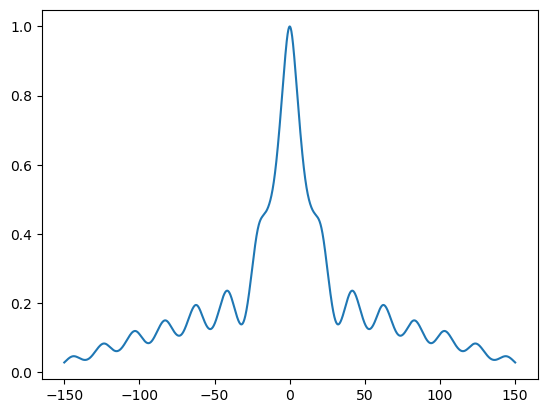

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000025C48C8>

In [15]:
lags = -1500:1500
A = my_crosscor(vv[3,:],vv[3,:],lags)
plot(lags*h*obs_gap,real(A))

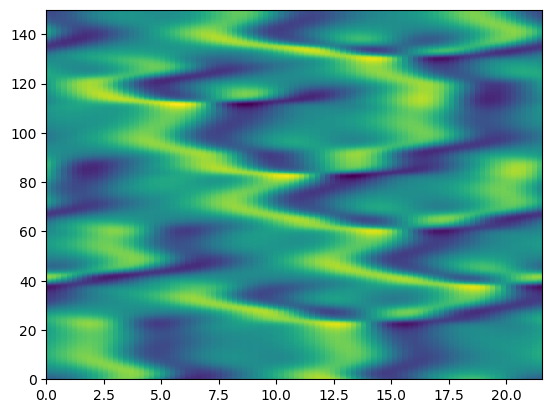

PyObject <matplotlib.image.AxesImage object at 0x00000000024B5588>

In [16]:
H1 = imshow(uu[:,ind_start:ind_stop]', extent=[0,21.55,0,150], aspect="auto")

In [17]:
M_out = 2000

Dat_wf = load("..\\Temp Developement\\Data\\KSE_wf$gen-Mo$M_out.jld")
h_wf = Dat_wf["dat_h_wf"]

5×35×2000 Array{Complex{Float64},3}:
[:, :, 1] =
 -88364.2+9652.11im   403.072-176.651im  …  0.0371644-0.0907362im
  54069.9+3388.75im   1386.32-1429.73im       -0.4012-0.461807im
  37104.3+2479.52im  -328.612+714.016im      0.344424+0.0822809im
 158961.0+69260.0im   881.889-333.107im     -0.168489-0.317639im
 -34807.7+36965.0im   752.768+531.543im      0.269992+0.0696364im

[:, :, 2] =
  155114.0-21572.4im   -4568.76-2881.18im  …  -0.0882003+0.194256im
 -221523.0-3484.04im    3526.52-14918.1im        1.02082+1.12728im
 -178285.0+27963.4im    7705.74-984.093im      -0.745888-0.761546im
 -405469.0-161176.0im   24131.0-6413.1im         0.37377+0.905545im
   98039.6-99737.1im    14103.3-2337.95im      -0.844181-0.195657im

[:, :, 3] =
 -37480.7+4157.64im   3030.15+3062.86im  …  -0.00766132-0.0804522im
 159937.0-4548.43im  -25800.8+23838.5im        -0.65128-0.657375im
  91426.4-45731.5im  -28571.6-11123.8im        0.105943+1.22143im
 221005.0+85976.7im  -50512.9+15660.5im       -0.261676-0

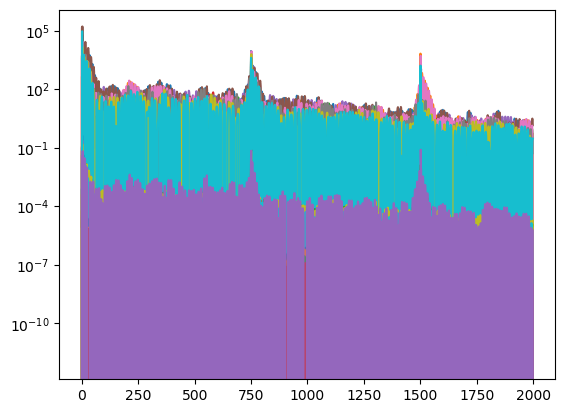

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


35-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002576888>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7308>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E74C8>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7688>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7888>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7A88>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7C48>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7E08>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7848>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020E7A48>
 PyObject <matplotlib.lines.Line2D object at 0x00000000025A2288>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020EC488>
 PyObject <matplotlib.lines.Line2D object at 0x00000000020EC648>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x00000000020EF9C8>
 PyObject <matplotlib.lines.Line2D object at 0x000

In [18]:
semilogy(h_wf[1,:,:]')

## Run the reduced model

In [19]:
Dat_rm = load("..\\Temp Developement\\Data\\KSE_rmrun$gen-Mo$M_out.jld")
uu_rm = Dat_rm["dat_UU_rm"]
vv_rm = Dat_rm["dat_VV_rm"]

blup = findall(isnan,uu_rm[1,:])[1]
println("Blow-up step $blup")

Blow-up step 2003


In [40]:
H2 = heatmap(P/N*(1:N),tt[ind_start:ind_stop],uu_rm[:,ind_start:ind_stop]')

BoundsError: BoundsError: attempt to access 128×1501 Array{Float64,2} at index [Base.Slice(Base.OneTo(128)), 1:2000]

In [6]:
uu_rm

128×1501 Array{Float64,2}:
 -3.72338  -5.79852   -0.804877   0.950258   …  -1.07311e-8   -2.4827e-8
 -3.62529  -5.90188   -0.82577    1.05381       -8.40178e-9   -2.35719e-8
 -3.49452  -5.82735   -0.863543   1.11158       -6.17031e-9   -2.22891e-8
 -3.3355   -5.5723    -0.914856   1.11566       -4.10573e-9   -2.10221e-8
 -3.15273  -5.14226   -0.974634   1.06064       -2.27202e-9   -1.98116e-8
 -2.95064  -4.55092   -1.03653    0.944193   …  -7.2467e-10   -1.86933e-8
 -2.73361  -3.81976   -1.09346    0.767439       4.92521e-10  -1.76956e-8
 -2.50595  -2.9772    -1.13824    0.535153       1.35017e-9   -1.68383e-8
 -2.27196  -2.05739   -1.16415    0.25574        1.83541e-9   -1.61312e-8
 -2.03601  -1.09862   -1.16548   -0.0590032      1.95319e-9   -1.55737e-8
 -1.8026   -0.141558  -1.13807   -0.394336   …   1.72668e-9   -1.51544e-8
 -1.57642   0.772784  -1.07961   -0.733223       1.19674e-9   -1.48524e-8
 -1.36237   1.60504   -0.989928  -1.05715        4.20407e-10  -1.46379e-8
  ⋮         